In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')
#print(df)
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2341,ham,Tell dear what happen to you. Why you talking ...,NaN,NaN,NaN
5123,ham,"Hi Chikku, send some nice msgs",NaN,NaN,NaN
5117,ham,Aslamalaikkum....insha allah tohar beeen muht ...,NaN,NaN,NaN
512,ham,Lol ok your forgiven :),NaN,NaN,NaN
2847,ham,Sad story of a Man - Last week was my b'day. M...,NaN,NaN,NaN
3838,ham,Erm Û_ ill pick you up at about 6.45pm. That'...,NaN,NaN,NaN
3115,ham,Uncle Abbey! Happy New Year. Abiola,NaN,NaN,NaN
959,ham,Where @,NaN,NaN,NaN
2417,ham,Oh... Lk tt den we take e one tt ends at cine ...,NaN,NaN,NaN
1207,ham,I need you to be in my strong arms...,NaN,NaN,NaN


Data Cleaning

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#since there are many values null in unnamed 2 3 and 4 we will drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [5]:
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [7]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
##finding missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
#for finding and removing  duplicate
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df.shape

(5572, 2)

In [12]:
#Data analysis
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

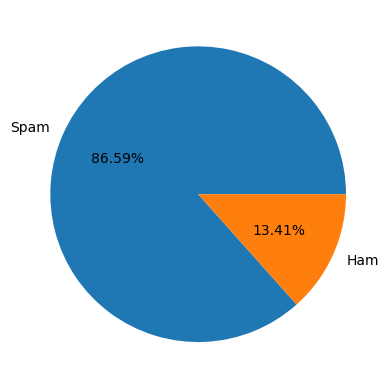

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Spam','Ham'],autopct='%0.2f%%')
plt.show()

In [15]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/kaeya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['total_characters']= df['text'].apply(len)

In [17]:
df.head()

,target,text,total_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
#no. of words used in per messages
df['num_of_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()


,target,text,total_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df[['total_characters','num_of_words','num_of_sentences']].describe()

,total_characters,num_of_words,num_of_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
#for ham meassages
df[df['target']==0][['total_characters','num_of_words','num_of_sentences']]

,total_characters,num_of_words,num_of_sentences
0,111,24,2
1,29,8,2
3,49,13,1
4,61,15,1
6,77,18,2
...,...,...,...
5565,12,4,1
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [21]:
#for spam messages
df[df['target']==1][['total_characters','num_of_words','num_of_sentences']]

,total_characters,num_of_words,num_of_sentences
2,155,37,2
5,148,39,4
8,158,32,5
9,154,31,3
11,136,31,3
...,...,...,...
5537,90,18,3
5540,160,38,6
5547,160,35,5
5566,147,30,1


<Axes: xlabel='total_characters', ylabel='Count'>

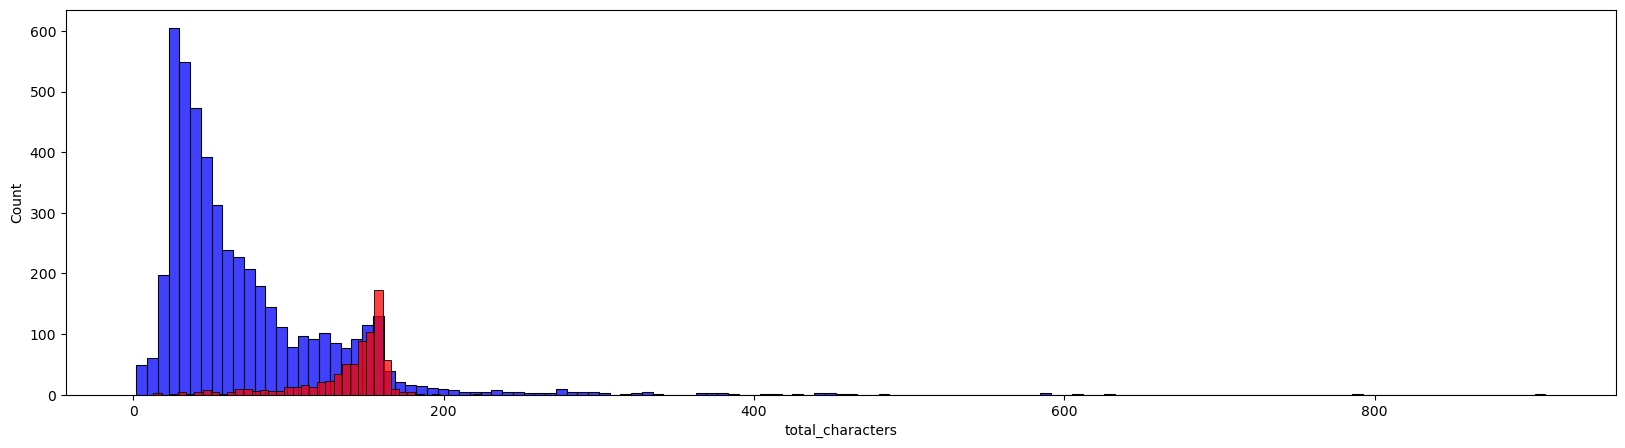

In [22]:
plt.figure(figsize=(20,5))
import seaborn as sns
sns.histplot(df[df['target']==0]['total_characters'],color='blue')    
sns.histplot(df[df['target']==1]['total_characters'],color='red')    

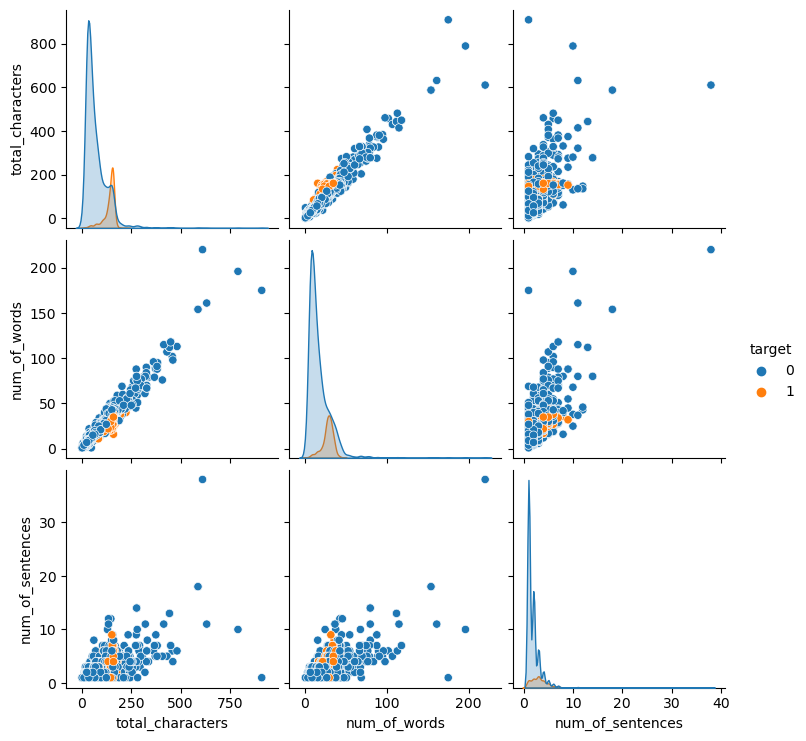

In [23]:
sns.pairplot(df,hue='target')

<Axes: >

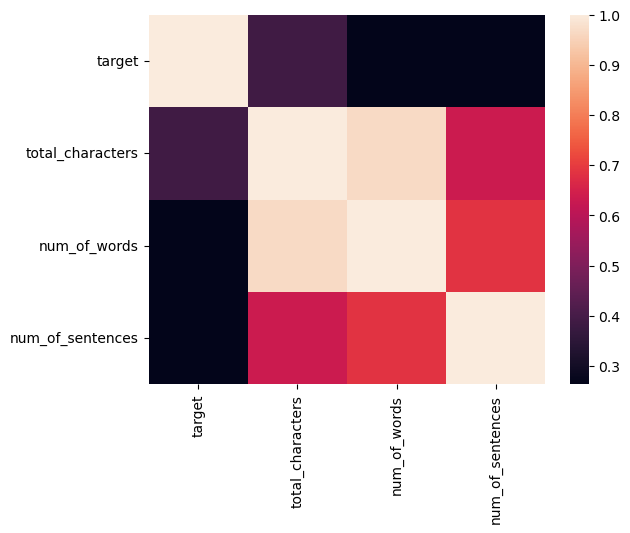

In [24]:
sns.heatmap(df.corr(numeric_only=True))


Data Preprocessing
-> lowercase
-> tokenization
-> remove special chatacters
-> remove stop words
-> stemming

In [25]:
# from nltk.corpus import stopwords
# nltk.download("stopwords")
# import string
# from nltk.stem.porter import PorterStemmer as ps

# def transform_text(text):
#     text = text.lower()
#     text = nltk.word_tokenize(text)
    
#     y = []
#     for i in text:
#         if i.isalnum():
#             y.append(i)
            
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)
            
#     text = y[:]

#     for i in text:
#         y.append(ps.stem(i))
#     return " ".join(y)
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

# Download NLTK resources
import nltk
nltk.download("stopwords")
nltk.download("punkt")

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    text = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric characters
    text = [i for i in text if i.isalnum()]
    
    # Remove stopwords and punctuation, and perform stemming
    stemmer = PorterStemmer()
    text = [stemmer.stem(i) for i in text if i not in stopwords.words('english') and i not in string.punctuation]
    
    return " ".join(text)

[nltk_data] Downloading package stopwords to /home/kaeya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kaeya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
df['transformed_text']= df['text'].apply(transform_text)
df.head()

,target,text,total_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [27]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [28]:
len(spam_corpus)

11490

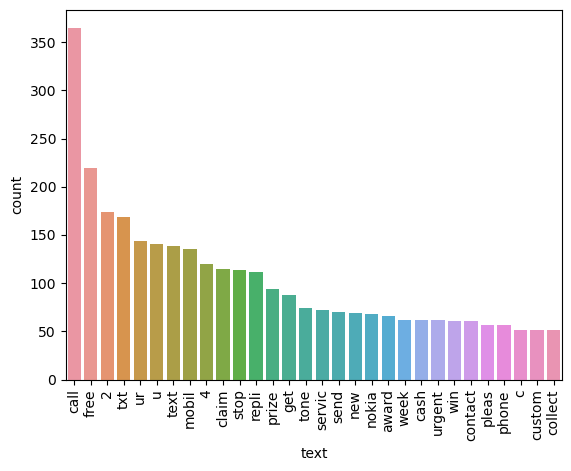

In [29]:
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
text_counter = Counter(spam_corpus)

# Get the most common 30 texts with their counts
most_common_texts = text_counter.most_common(30)

# Convert the most common texts and their counts to a DataFrame
df_most_common_texts = pd.DataFrame(most_common_texts, columns=['text', 'count'])

# Plot the barplot
sns.barplot(data=df_most_common_texts, x='text', y='count')
plt.xticks(rotation='vertical')
plt.show()

In [30]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [31]:
len(ham_corpus)

38221

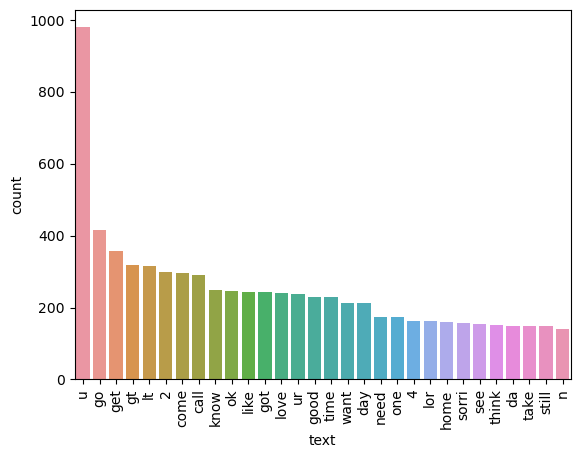

In [32]:
from collections import Counter
text_counter = Counter(ham_corpus)
most_common_texts = text_counter.most_common(30)
df_most_common_texts = pd.DataFrame(most_common_texts, columns=['text', 'count'])

# Plot the barplot
sns.barplot(data=df_most_common_texts, x='text', y='count')
plt.xticks(rotation='vertical')
plt.show()

 Model building

In [33]:
df.head()

,target,text,total_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

x=tfidf.fit_transform(df['transformed_text']).toarray()

In [35]:
x.shape

(5572, 5000)

In [36]:
y = df['target'].values 
y

array([0, 0, 1, ..., 0, 0, 0])

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [38]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [39]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [55]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9623318385650225
[[957   0]
 [ 42 116]]
1.0


In [41]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9704035874439462
[[955   2]
 [ 31 127]]
0.9844961240310077


In [42]:
#since we got using the tfidfvectorizer  (in multinominalNB) we got the precision of 100% we will use this!!!


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [44]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc =  RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [45]:
clfs ={
    'SVC':svc,
    'KNC':knc,
    'MNB':mnb,
    'DTC':dtc,
    'LRC':lrc,
    'RFC':rfc,
    'ABC':abc,
    'BC':bc,
    'ETC':etc,
    'GBDT':gbdt
}

In [46]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [47]:
accuracy_scores = []
precision_scores =[]
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    print( " for: ",name)
    print("accuracy: ",current_accuracy)
    print("precision: ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


 for:  SVC
accuracy:  0.9668161434977578
precision:  0.9763779527559056
 for:  KNC
accuracy:  0.9004484304932735
precision:  1.0
 for:  MNB
accuracy:  0.9623318385650225
precision:  1.0
 for:  DTC
accuracy:  0.9246636771300448
precision:  0.8775510204081632
 for:  LRC
accuracy:  0.9461883408071748
precision:  0.9537037037037037
 for:  RFC
accuracy:  0.9650224215246637
precision:  1.0


/usr/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


 for:  ABC
accuracy:  0.9596412556053812
precision:  0.937984496124031
 for:  BC
accuracy:  0.9596412556053812
precision:  0.937984496124031
 for:  ETC
accuracy:  0.968609865470852
precision:  1.0
 for:  GBDT
accuracy:  0.9381165919282511
precision:  0.9405940594059405


In [48]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KNC,0.900448,1.000000
2,MNB,0.962332,1.000000
5,RFC,0.965022,1.000000
8,ETC,0.968610,1.000000
0,SVC,0.966816,0.976378
4,LRC,0.946188,0.953704
9,GBDT,0.938117,0.940594
6,ABC,0.959641,0.937984
7,BC,0.959641,0.937984
3,DTC,0.924664,0.877551


MODEL IMPROVEMENT

changing the max features of vectroizer to 5000

In [49]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier


In [50]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [51]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [52]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9721973094170404
Precision 1.0


In [57]:
import pickle
pickle.dump(tfidf,open('vectroizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
